In [461]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import random

Initializing Centroids And Data Points

In [462]:
centroids = [(3.0, 3.0), (2.0, 2.0)]

X = [
    (5.1, 3.5),
    (4.9, 3.0),
    (5.8, 2.7),
    (6.0, 3.0),
    (6.7, 3.1),
    (4.5, 2.3),
    (6.1, 2.8),
    (5.2, 3.2),
    (5.5, 2.6),
    (5.0, 2.0),
    (8.0, 0.5),
    (7.5, 0.8),
    (8.1, -0.1),
    (2.5, 3.5),
    (1.0, 3.0),
    (4.5, -1.0),
    (3.0, -0.5),
    (5.1, -0.2),
    (6.0, -1.5),
    (3.5, -0.1),
    (4.0, 0.0),
    (6.1, 0.5),
    (5.4, -0.5),
    (5.3, 0.3),
    (5.8, 0.6)
]

Part a - Implementing K-Means

In [463]:
class K_Means():
    # (a) Initialization
    def __init__(self, n_centroids, convergence_threshold, centroids = [], range_coords = []):
        '''Initializes the K_Means Model'''
        if centroids != []:
            if len(centroids) != n_centroids:
                raise ValueError("No. of centroids must be equal to the number of centroids in the array 'centroids'.")
            self.centroids = copy.deepcopy(centroids)
        else:
            # Randomly allocate centroids some value.
            self.centroids = []
            for i in range(n_centroids):
                self.centroids.append((round(random.uniform(range_coords[0][0], range_coords[0][1]), 1),
                                       round(random.uniform(range_coords[1][0], range_coords[1][1]), 1)))
        
        print(f"Initial Centroids -> {self.centroids}")

        self.clusters = [[] for i in range(n_centroids)]
        self.convergence_threshold = convergence_threshold
        self.data = []
        self.n_centroids = n_centroids
        self.initial_clusters = []

    # (b) Assignment
    def assignment(self):
        self.clusters = [[] for i in range(self.n_centroids)]

        for i in self.data:
            curr_min = float('inf')
            curr_centroid = 0
            for j in range(self.n_centroids):
                dist = ((i[0] - self.centroids[j][0])**2 + (i[1] - self.centroids[j][1])**2) ** 0.5 # Euclidean Distance
                if dist < curr_min:
                    curr_centroid = j
                    curr_min = dist
            self.clusters[curr_centroid].append(i)

    # (c) Update
    def update(self):
        curr_max_update = 0 # The current max change in centroid position
        for i in range(self.n_centroids):
            if len(self.clusters[i]) == 0:
                continue
            
            sum_x0 = 0
            sum_x1 = 0
            for j in self.clusters[i]:
                sum_x0 += j[0]
                sum_x1 += j[1]

            sum_x0 = sum_x0 / len(self.clusters[i])
            sum_x1 = sum_x1 / len(self.clusters[i])

            dist = ((sum_x0 - self.centroids[i][0])**2 + (sum_x1 - self.centroids[i][1])**2) ** 0.5
            # if dist > curr_max_update:
            curr_max_update += dist

            self.centroids[i] = (sum_x0, sum_x1)
        
        return curr_max_update
    
    # Computes the Loss Function
    def WCSS(self):
        total_loss = 0

        for i in range(self.n_centroids):
            for j in self.clusters[i]:
                total_loss += ((j[0] - self.centroids[i][0])**2 + (j[1] - self.centroids[i][1])**2)

        return total_loss
    
    def train(self, data):
        self.data = data

        for i in range(100):
            print(f"Epoch {i}")
            self.assignment()
            if i == 0:
                self.initial_clusters = copy.deepcopy(self.clusters)

            centroid_change = self.update()
            if centroid_change < self.convergence_threshold: # (d) Convergence Check - NOTE: (Assuming that the threshold means that the sum of changes for centroids is the threshold, not the max of an individual change.)
                print("Max Centroid Change seen is Below Threshold. STOPPING!")
                break

In [464]:
K_Means_Model = K_Means(2, 1e-4, centroids) # Initializing Model
K_Means_Model.train(X)

Initial Centroids -> [(3.0, 3.0), (2.0, 2.0)]
Epoch 0
Epoch 1
Epoch 2
Max Centroid Change seen is Below Threshold. STOPPING!


(b) Final Centroids

In [465]:
print(K_Means_Model.centroids)

[(5.8, 2.125), (4.199999999999999, -0.05555555555555555)]


Plotting the clusters.

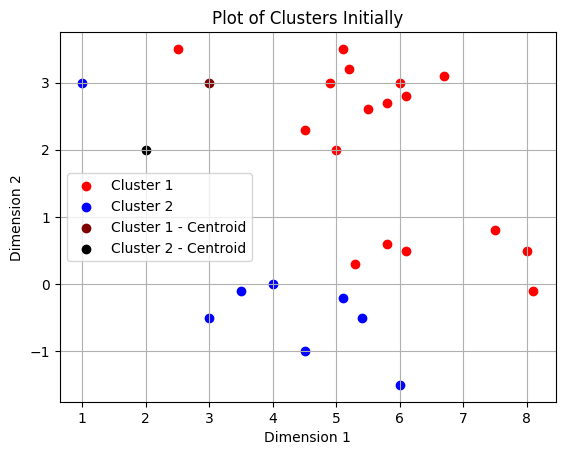

In [466]:
cluster_1 = np.array([[i[0], i[1]] for i in K_Means_Model.initial_clusters[0]])
cluster_2 = np.array([[i[0], i[1]] for i in K_Means_Model.initial_clusters[1]])

centroid_1 = np.array([[centroids[0][0], centroids[0][1]]])
centroid_2 = np.array([[centroids[1][0], centroids[1][1]]])

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='blue', label='Cluster 2')
plt.scatter(centroid_1[:, 0], centroid_1[:, 1], color='maroon', label='Cluster 1 - Centroid')
plt.scatter(centroid_2[:, 0], centroid_2[:, 1], color='black', label='Cluster 2 - Centroid')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Plot of Clusters Initially')
plt.legend()
plt.grid(True)
plt.show()


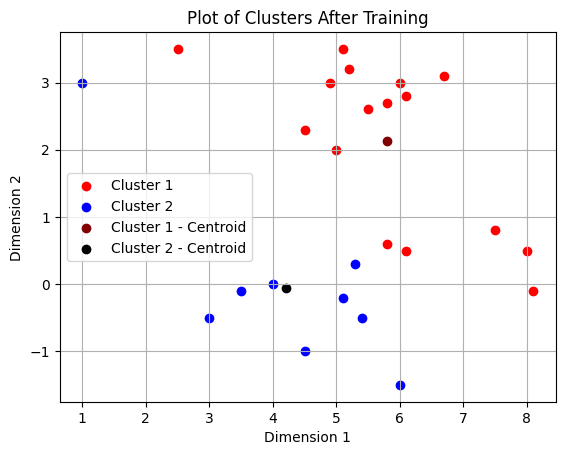

In [467]:
cluster_1 = np.array([[i[0], i[1]] for i in K_Means_Model.clusters[0]])
cluster_2 = np.array([[i[0], i[1]] for i in K_Means_Model.clusters[1]])

centroid_1 = np.array([[K_Means_Model.centroids[0][0], K_Means_Model.centroids[0][1]]])
centroid_2 = np.array([[K_Means_Model.centroids[1][0], K_Means_Model.centroids[1][1]]])

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='blue', label='Cluster 2')
plt.scatter(centroid_1[:, 0], centroid_1[:, 1], color='maroon', label='Cluster 1 - Centroid')
plt.scatter(centroid_2[:, 0], centroid_2[:, 1], color='black', label='Cluster 2 - Centroid')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Plot of Clusters After Training')
plt.legend()
plt.grid(True)
plt.show()


Part (c) -> Comparing Randomized to Normal Centroid Initialization

In [468]:
# Finding range of values to know the bounds for random initialization.
first_dim = [tup[0] for tup in X]
second_dim = [tup[1] for tup in X]

first_dim_min_max = [min(first_dim), max(first_dim)]
second_dim_min_max = [min(second_dim), max(second_dim)]

tuple_range = [first_dim_min_max, second_dim_min_max]

In [469]:
init_KMeans = K_Means(n_centroids=2, convergence_threshold=1e-4, centroids=centroids)
rand_KMeans = K_Means(n_centroids=2, convergence_threshold=1e-4, range_coords=tuple_range)

init_KMeans.train(X)
rand_KMeans.train(X)

print(f"\nWCSS with Initialized Clusters -> {init_KMeans.WCSS()}. WCSS with Random Clusters -> {rand_KMeans.WCSS()}")

Initial Centroids -> [(3.0, 3.0), (2.0, 2.0)]
Initial Centroids -> [(6.0, 3.3), (3.8, 0.4)]
Epoch 0
Epoch 1
Epoch 2
Max Centroid Change seen is Below Threshold. STOPPING!
Epoch 0
Epoch 1
Max Centroid Change seen is Below Threshold. STOPPING!

WCSS with Initialized Clusters -> 83.67222222222222. WCSS with Random Clusters -> 85.1776282051282


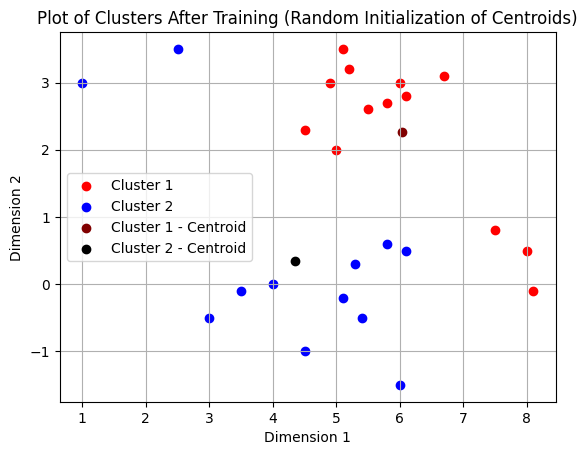

In [470]:
cluster_1 = np.array([[i[0], i[1]] for i in rand_KMeans.clusters[0]])
cluster_2 = np.array([[i[0], i[1]] for i in rand_KMeans.clusters[1]])

centroid_1 = np.array([[rand_KMeans.centroids[0][0], rand_KMeans.centroids[0][1]]])
centroid_2 = np.array([[rand_KMeans.centroids[1][0], rand_KMeans.centroids[1][1]]])

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='blue', label='Cluster 2')
plt.scatter(centroid_1[:, 0], centroid_1[:, 1], color='maroon', label='Cluster 1 - Centroid')
plt.scatter(centroid_2[:, 0], centroid_2[:, 1], color='black', label='Cluster 2 - Centroid')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Plot of Clusters After Training (Random Initialization of Centroids)')
plt.legend()
plt.grid(True)
plt.show()

Part (d) -> Elbow Method

In [471]:
WCSS_arr = []

for i in range(2, 11):
    print(f"No. of Clusters : {i}")
    rand_KMeans = K_Means(n_centroids=i, convergence_threshold=1e-4, range_coords=tuple_range)
    rand_KMeans.train(X)

    print(f"WCSS -> {rand_KMeans.WCSS()}\n")
    WCSS_arr.append(rand_KMeans.WCSS())

No. of Clusters : 2
Initial Centroids -> [(2.0, 3.3), (1.2, 2.0)]
Epoch 0
Epoch 1
Max Centroid Change seen is Below Threshold. STOPPING!
WCSS -> 83.67222222222222

No. of Clusters : 3
Initial Centroids -> [(3.2, -0.3), (7.8, 2.4), (3.8, -0.1)]
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Max Centroid Change seen is Below Threshold. STOPPING!
WCSS -> 47.47560606060606

No. of Clusters : 4
Initial Centroids -> [(3.8, 1.7), (4.1, -0.4), (6.5, 0.2), (5.9, 2.4)]
Epoch 0
Epoch 1
Epoch 2
Max Centroid Change seen is Below Threshold. STOPPING!
WCSS -> 23.772

No. of Clusters : 5
Initial Centroids -> [(3.6, 0.6), (7.8, -1.2), (3.3, 0.6), (5.3, 2.1), (5.9, 1.7)]
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Max Centroid Change seen is Below Threshold. STOPPING!
WCSS -> 13.460333333333335

No. of Clusters : 6
Initial Centroids -> [(5.3, 0.0), (4.1, -0.3), (3.0, 3.5), (4.0, 3.4), (2.0, 1.5), (2.9, 0.6)]
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Max Centroid Change seen is Below Threshold. STOPPI

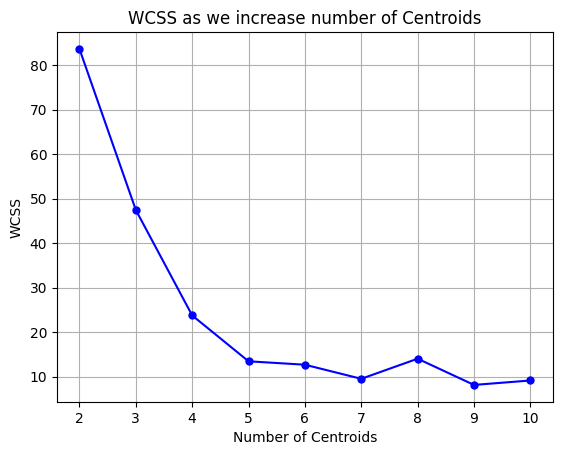

In [472]:
centroid_arr = [i for i in range(2,11)]

plt.plot(centroid_arr, WCSS_arr, marker='o', color='b', linestyle='-', markersize=5)
plt.xlabel('Number of Centroids')
plt.ylabel('WCSS')
plt.title('WCSS as we increase number of Centroids')

plt.grid(True)
plt.show()

Clearly, based on the diagram above, 5 is the elbow. So, we shall set M to be 5.

Initial Centroids -> [(5.2, 1.3), (2.1, 2.4), (7.4, 1.5), (6.6, 1.9), (4.8, 3.3)]
Epoch 0
Epoch 1
Epoch 2
Max Centroid Change seen is Below Threshold. STOPPING!
Final Centroids -> [(4.869999999999999, -0.24000000000000005), (1.75, 3.25), (7.866666666666667, 0.39999999999999997), (6.15, 2.9000000000000004), (5.033333333333333, 2.766666666666667)]


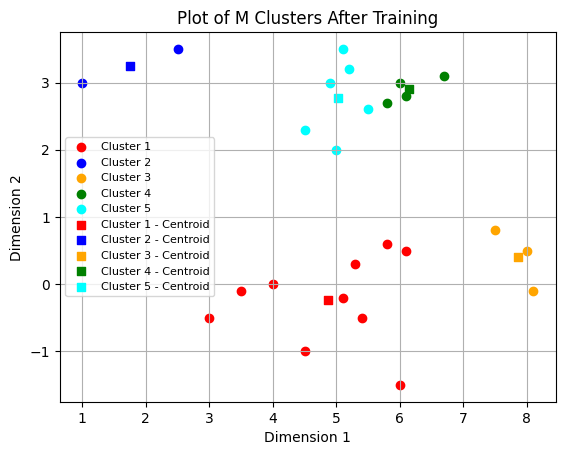

In [473]:
rand_KMeans = K_Means(n_centroids=5, convergence_threshold=1e-4, range_coords=tuple_range)
rand_KMeans.train(X)
print(f"Final Centroids -> {rand_KMeans.centroids}")

cluster_1 = np.array([[i[0], i[1]] for i in rand_KMeans.clusters[0]])
cluster_2 = np.array([[i[0], i[1]] for i in rand_KMeans.clusters[1]])
cluster_3 = np.array([[i[0], i[1]] for i in rand_KMeans.clusters[2]])
cluster_4 = np.array([[i[0], i[1]] for i in rand_KMeans.clusters[3]])
cluster_5 = np.array([[i[0], i[1]] for i in rand_KMeans.clusters[4]])

centroid_1 = np.array([[rand_KMeans.centroids[0][0], rand_KMeans.centroids[0][1]]])
centroid_2 = np.array([[rand_KMeans.centroids[1][0], rand_KMeans.centroids[1][1]]])
centroid_3 = np.array([[rand_KMeans.centroids[2][0], rand_KMeans.centroids[2][1]]])
centroid_4 = np.array([[rand_KMeans.centroids[3][0], rand_KMeans.centroids[3][1]]])
centroid_5 = np.array([[rand_KMeans.centroids[4][0], rand_KMeans.centroids[4][1]]])

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='blue', label='Cluster 2')
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], color='orange', label='Cluster 3')
plt.scatter(cluster_4[:, 0], cluster_4[:, 1], color='green', label='Cluster 4')
plt.scatter(cluster_5[:, 0], cluster_5[:, 1], color='cyan', label='Cluster 5')

plt.scatter(centroid_1[:, 0], centroid_1[:, 1], marker = 's', color='red', label='Cluster 1 - Centroid')
plt.scatter(centroid_2[:, 0], centroid_2[:, 1], marker = 's', color='blue', label='Cluster 2 - Centroid')
plt.scatter(centroid_3[:, 0], centroid_3[:, 1], marker = 's', color='orange', label='Cluster 3 - Centroid')
plt.scatter(centroid_4[:, 0], centroid_4[:, 1], marker = 's', color='green', label='Cluster 4 - Centroid')
plt.scatter(centroid_5[:, 0], centroid_5[:, 1], marker = 's', color='cyan', label='Cluster 5 - Centroid')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Plot of M Clusters After Training')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()